In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import os
import import_ipynb
import dataprep as prep
home_dir = os.getcwd()

importing Jupyter notebook from dataprep.ipynb


In [2]:
train_data = pd.read_csv(home_dir + '/scania/training_set_new.csv')
test_data = pd.read_csv(home_dir + '/scania/test_set_new.csv') 
live_data = pd.read_csv(home_dir + '/scania/live_training_set.csv') 

In [3]:
data_arrays = pd.concat([train_data, test_data, live_data])

In [4]:
dataset = pd.DataFrame(data_arrays)

In [5]:
dataset.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,32214,na,0,na,0,0,0,0,0,...,274482,154994,427264,470402,118670,43812,21268,0,0,0
1,neg,344,0,2130706432,44,0,0,0,0,0,...,3842,564,1046,942,1744,5980,34,0,0,0
2,neg,6,0,2,2,0,0,0,0,0,...,42,22,102,4,0,0,0,0,0,0
3,neg,38,0,68,66,0,0,0,0,0,...,476,72,110,0,0,0,0,0,0,0
4,neg,680,0,14,na,0,0,0,0,0,...,2306,1384,2388,1466,2444,18560,4,0,0,0


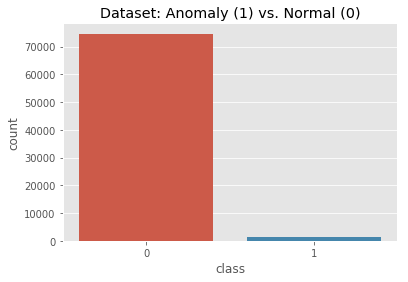

In [6]:
y_data, x_data = prep.prepare(dataset)

In [7]:
x_data = normalize(x_data)

## Create datasets with different sampling methods

#### to study later how this new balance affects classification

In [9]:
data_with_undersampling_x, data_with_undersampling_y = prep.undersample(x_data, y_data)

[(0, 74468), (1, 1375)]
Removed indexes: [    0     1     2 ... 75997 75998 75999]


In [10]:
data_with_oversampling_x, data_with_oversampling_y = prep.oversample(x_data, y_data)

[(0, 74625), (1, 74625)]


In [11]:
data_with_combinedsampling_x,data_with_combinedsampling_x  = prep.combine_samplings(x_data, y_data)

[(0, 74623), (1, 74623)]
